In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from pandas import *
from itertools import groupby
np.random.seed(1234)


(100, 100) (100, 100)


/home/quantumiracle/anaconda3/envs/x/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


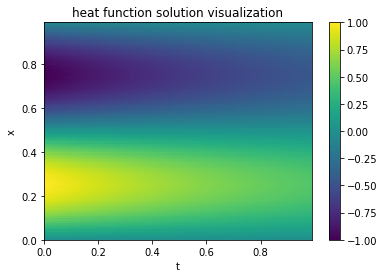

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import ma
from matplotlib import ticker, cm

num_points = 100
nu = 0.02
x_low, x_high = 0, 1
t_low, t_high = 0, 1
x = np.arange(x_low, x_high, (x_high-x_low)/num_points)
t = np.arange(t_low, t_high, (t_high-t_low)/num_points)

X, T = np.meshgrid(x, t)
print(X.shape, T.shape)
solution = lambda  x, t: np.exp(-4 * np.pi**2 * t * nu)*np.sin(2*np.pi*x)
Z = solution(X, T)

# print(Z)
cs = plt.pcolor(T, X, Z)
cbar = plt.colorbar(cs)
plt.ylabel('x')
plt.xlabel('t')
plt.title('heat function solution visualization')
plt.savefig('figures/heat_sol.png', dpi=300)
plt.show()

In [22]:
def generate_data(N_e=1e2, N_d=1e2, N_t=1e2, path=''):
    # collocation points
    x_low, x_high = 0, 1
    t_low, t_high = 0, 1
    num_points = int(np.sqrt(N_e))
    x = np.arange(x_low, x_high, (x_high-x_low)/num_points)
    t = np.arange(t_low, t_high, (t_high-t_low)/num_points)
    X, T = np.meshgrid(x, t)
    collc_z = solution(X, T).reshape(-1)
    collc_x = X.reshape(X.shape[0]*X.shape[1], 1)
    collc_t = T.reshape(T.shape[0]*T.shape[1], 1)
    collc_xt = np.concatenate((collc_x, collc_t), axis=-1)
    print(collc_xt.shape, collc_z.shape)

    def generate_random(N_d):
        data_xt = []
        rand_x = np.random.uniform(x_low, x_high, int(N_d))
        rand_t = np.random.uniform(t_low, t_high, int(N_d))

        data_z = solution(rand_x, rand_t) 
        rand_x = rand_x.reshape(rand_x.shape[0], 1)
        rand_t = rand_t.reshape(rand_t.shape[0], 1)
        data_xt = np.concatenate((rand_x, rand_t), axis=-1)
        print(data_xt.shape, data_z.shape)
        return data_xt, data_z

    # data points
    data_xt, data_z = generate_random(N_d)

    # test points
    test_xt, test_z = generate_random(N_t)

    data_dict = {'collc_points': {'xt': collc_xt, 'z': collc_z},
                'data_points': {'xt': data_xt, 'z': data_z},
                'test_points': {'xt': test_xt, 'z': test_z},
                }

    np.save(path, data_dict)

generate_data(N_e=1e6, N_d=1e5, N_t=1e5, path='data/heat_equation_data.npy')

(1000000, 2) (1000000,)
(100000, 2) (100000,)
(100000, 2) (100000,)


In [24]:
data = np.load('data/heat_equation_data.npy', allow_pickle=True)
data = data.item()
print(data.keys())

dict_keys(['collc_points', 'data_points', 'test_points'])
